In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
from pathlib import Path
sns.set_style("white")

In [2]:
a = np.load("/lustre/scratch/client/vinai/users/trungdt21/workspace/matching/data/validation/extracted_no_move/CFP_FP/r100_arcface_feat/feat.npz")

In [3]:
b = a.get("arr_0").reshape(7000, 2, 512)

In [4]:
sims = []
for pair in b:
    sims.append(pair[0].dot(pair[1]))
sims = np.array(sims)

In [12]:
issamelist = np.load("/lustre/scratch/client/vinai/users/trungdt21/workspace/matching/data/validation/extracted_no_move/CFP_FP/issamelist.npy")
pos_sims = sims[issamelist]
np.mean(pos_sims)

0.50899273

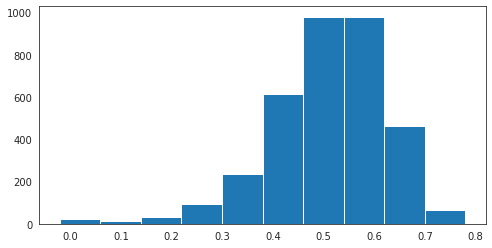

In [11]:
fig = plt.figure(figsize=(8,4))
plt.hist(pos_sims);

In [16]:
feats = np.load("/lustre/scratch/client/guardpro/trungdt21/research/face_gen/data/_processed/project_face_gen/VFHQ/v1/aligned112x112_10pereach/feats/r101/feat.npz").get("arr_0")

In [18]:
feats.shape

(196047, 512)

In [19]:
with open("/lustre/scratch/client/guardpro/trungdt21/research/face_gen/data/_processed/project_face_gen/VFHQ/v1/aligned112x112_10pereach/feats/r101/paths.txt", "r") as f:
    lines = f.readlines()
paths = list(map(lambda x: x.strip(), lines))
        

In [24]:
with open("/lustre/scratch/client/guardpro/trungdt21/research/face_gen/data/_processed/project_face_gen/VFHQ/v1/aligned112x112_10pereach/sample_3bins_v1/f2e.txt", "r") as f:
    pairs = f.readlines()
pairs = list(map(lambda x: x.strip(), pairs))

In [27]:
issame_list = []
for pair in pairs:
    p1,p2,issame = pair.split("\t")
    if issame == "1":
        issame_list.append((p1,p2))

In [31]:
issame_list_to_idx = []
for pair in issame_list:
    issame_list_to_idx.append((paths.index(pair[0]), paths.index(pair[1])))

In [33]:
pair_feats = []
for pair_idx in issame_list_to_idx:
    pair_feats.append((feats[pair_idx[0]],feats[pair_idx[1]]))
pair_feats = np.array(pair_feats)
pair_feats.shape

(10000, 2, 512)

In [34]:
sims = []
for pair_feat in pair_feats:
    sims.append(pair_feat[0].dot(pair_feat[1]))
sims = np.array(sims)

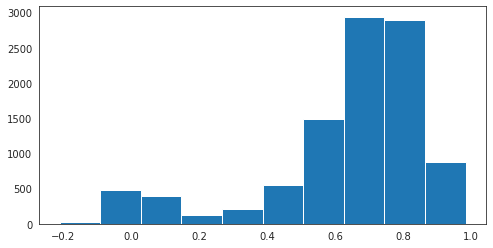

In [37]:
fig = plt.figure(figsize=(8,4))
plt.hist(sims);

In [39]:
sims_bad_ids = sims<0.2

In [42]:
paths_npy = np.array(paths)

In [47]:
issame_list_npy = np.array(issame_list)

In [48]:
issame_list_npy_bad = issame_list_npy[sims_bad_ids]

In [57]:
baddir=Path("./badaligned")
shutil.rmtree(baddir)
srcdir = Path("/lustre/scratch/client/guardpro/trungdt21/research/face_gen/data/_processed/project_face_gen/VFHQ/v1/aligned112x112_10pereach/images")
baddir.mkdir(exist_ok=True, parents=True)
for bad_pair in issame_list_npy_bad:
    p1, p2 = bad_pair
    p1, p2 = Path(p1), Path(p2)
    dst1, dst2 = baddir/f"{p1.parent.parent.name}_{p1.parent.name}_{p1.name}", baddir/f"{p2.parent.parent.name}_{p2.parent.name}_{p2.name}"
    shutil.copy2(srcdir/p1, dst1)
    shutil.copy2(srcdir/p2, dst2)

In [ ]:
shutil.rmtree(baddir)